# 1. Introduction 

For this project we were asked to select a dataset and using the data answer a question of our 
choosing. I selected the Titanic Data Set which looks at the characteristics of a sample of the
passengers on the Titanic, including whether they survived or not, gender, age, 
siblings / spouses, parents and children, fare (cost of ticket), embarkation port.

After looking at the contents of the dataset, I thought it would be interesting to look at the following questions:
Which gender had a better chance of survival?
Which social class had a better chance of survival?
Which age group had a better chance of survival?
Is the number of siblings/spouse associated with the survival?
Is the number of parents and children associated with survival?


# 2. Method

In order to analyse and report on the data, I have choosen to use ipython notebook, 
along with the numpy, pandas, matplotlib.pyplot and seaborn python modules. In order 
to use these modules they needed to be imported into the notebook first as per below.


In [1]:
#importing of required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numbers import Number
from scipy import stats
#allow plots and visualisations to be displayed in the report
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def as_percent(val, precision='0.2'):
    """Convert number to percentage string."""
    if isinstance(val, Number):
        return "{{:{}%}}".format(precision).format(val)
    else:
        raise TypeError("Numeric type required")

def calculate_percentage(val, total, format_percent = False):
    """Calculates the percentage of a value over a total"""
    percent = np.divide(val, total, dtype=float)
    if format_percent:
        percent = as_percent(percent)
    return percent

# 3. Read csv files

In [3]:
# Read csv into Pandas Dataframe and store in dataset variable
titanic_df = pd.read_csv('titanic_data.csv')
titanic_df2 = pd.read_csv('titanic_data.csv')

# 4. Data Wrangling 

Before working with the data it is necessary to look at what needed to be cleaned up
i.e. find missing data, remove data that will not assist with the analysis.


In [4]:
# print out information about the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


After printing out the dataset information above, we can see that the Age, Cabin and Embarked columns are missing entries. As the Cabin and embarked port columns are not relevant to the analysis of the data I will be removing that columns. And I will need to find a way update populate the missing ages.


# 4.1 Missing value for age

In [5]:
missing_ages = titanic_df2[titanic_df['Age'].isnull()]
# determine mean age based on Sex and Pclass
mean_ages = titanic_df2.groupby(['Sex','Pclass'])['Age'].mean()

# fill the missing age values with the mean age based on sex and pclass
def remove_na_ages(row):
    '''
    function to check if the age is null and replace wth the mean from 
    the mean ages dataframe 
    '''
    if pd.isnull(row['Age']):
        return mean_ages[row['Sex'],row['Pclass']]
    else:
        return row['Age']

titanic_df2['Age'] =titanic_df2.apply(remove_na_ages, axis=1)

In [6]:
# Grouping age values
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
titanic_df['age_group'] = pd.cut(titanic_df.Age, range(0, 90, 10), right=False, labels=age_labels)
titanic_df2['age_group'] = pd.cut(titanic_df2.Age, range(0, 90, 10), right=False, labels=age_labels)

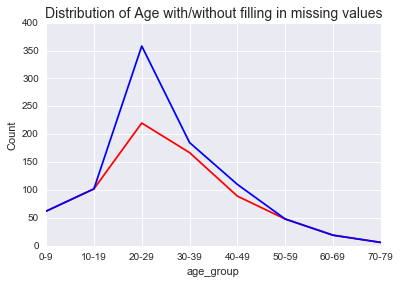

In [7]:
# plot of distribution o age without filling in missing values(red line)
# plot of distribution o age with filling in missing values(blue line)
titanic_df.groupby(['age_group']).size().plot(kind='line',color='r')
plt.title("Distribution of Age with/without filling in missing values",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');
titanic_df2.groupby(['age_group']).size().plot(kind='line',color='b')

The above figure shows filling in missing values with the Age column artificially affects the distribution. We can observe this by plotting the line before and after. It means that I can't reasonably infer things about the Age variable and its relationships with other variables if I fill in missing values with mean. So I choose a simple way that it just removes the passengers with missing age when I need to use age variable.

# 4.2 Two datasets
1.One dataset not removed with missing age values is to be used for analyzing variables except age.
2.Another dataset reomoved with missing age values is to be used for analyzing age variable.

In [8]:
titanic_dropna = pd.read_csv('titanic_data.csv')

In [9]:
titanic_dropna['Age'].replace('', np.nan, inplace=True)
print "Row number for Survival variable before droping missing value:"
print len(titanic_dropna.Survived)

titanic_dropna.dropna(subset=['Age'], inplace=True)
print "Row number for Survival variable after droping missing value:"
print len(titanic_dropna.Survived)

Row number for Survival variable before droping missing value:
891
Row number for Survival variable after droping missing value:
714


In [10]:
titanic_dropna['age_group'] = pd.cut(titanic_df2.Age, range(0, 81, 10), right=False, labels=age_labels)

# 4.3 Removing extra columns

In [11]:
titanic_df = titanic_df.drop(['Cabin','Name','Ticket','Embarked'], axis=1)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
age_group      713 non-null category
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 56.7+ KB


In [12]:
titanic_dropna = titanic_dropna.drop(['Cabin','Name','Ticket','Embarked'], axis=1)
titanic_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
age_group      713 non-null category
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 51.0+ KB


# 4.4 Mapping data
In order to intrepret the data easier the following fields need to be modified:

•Survived - changed to boolean (1 = True, 0 = False)
•Pclass - changed to Socio-Economic status (1st - Upper Class, 2nd - Middle Class, 3rd - Lower Class)

In [13]:
def map_data(df):
    '''
    Function which takes the original dataframe and returns a 
    clean / updated dataframe
    '''
    # survived map
    survived_map = {0: False, 1: True}
    df['Survived'] = df['Survived'].map(survived_map)

    # PClass map
    pclass_map = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}
    df['Pclass'] = df['Pclass'].map(pclass_map)
    return df

titanic_df = map_data(titanic_df)


In [14]:
titanic_dropna = map_data(titanic_dropna)
print titanic_dropna.head(3)

   PassengerId Survived       Pclass     Sex   Age  SibSp  Parch     Fare  \
0            1    False  Lower Class    male  22.0      1      0   7.2500   
1            2     True  Upper Class  female  38.0      1      0  71.2833   
2            3     True  Lower Class  female  26.0      0      0   7.9250   

  age_group  
0     20-29  
1     30-39  
2     20-29  


# 5 Data Analysis

# 5.1 Gender and Survial

In [15]:
#Count and percentage of Survivals by gender
table = pd.crosstab(titanic_df['Survived'],titanic_df['Sex'])
print table
print " "
print titanic_df.groupby('Sex').Survived.mean()

Sex       female  male
Survived              
False         81   468
True         233   109
 
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


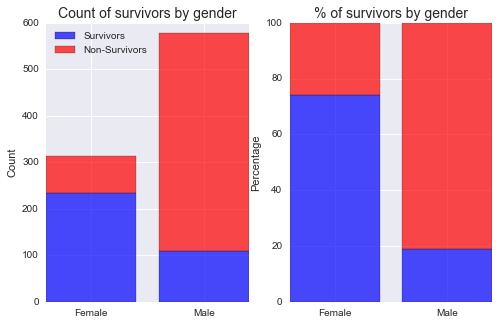

In [16]:
# Count number of passengers and number of survivors in sample data
survivors_data = titanic_df[titanic_df.Survived==True]
non_survivors_data = titanic_df[titanic_df.Survived==False]

# calculate values for each survival status
survivors_gender = survivors_data.groupby(['Sex']).size().values
non_survivors_gender = non_survivors_data.groupby(['Sex']).size().values

# calculate totals for percentates
totals = survivors_gender + non_survivors_gender

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_gender, totals)*100 
data2_percentages = calculate_percentage(non_survivors_gender, totals)*100 

gender_categories = ['Female', 'Male']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_gender)), survivors_gender, label='Survivors', alpha=0.7, color='b')
ax1.bar(range(len(non_survivors_gender)), non_survivors_gender, bottom=survivors_gender, label='Non-Survivors', alpha=0.7, color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4], gender_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by gender",fontsize=14)
plt.legend(loc='upper left')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.7, color='b')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.7, color='r')
plt.sca(ax2)
plt.xticks([0.4, 1.4],  gender_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by gender",fontsize=14)

The plots and proportions above show that there were more males on board the Titanic compared to the number of females. Whilst the second plot (% of survivors by gender) shows that Females had a higher proportion (74.2%) of survivors compared to the proportion of males (18.9%). This shows that females had a greater rate of survival.

# Hypotesting

Hypothesis 
H0 = Gender has no relationship with survival.
H1 = Gender has relationship with survival.

Conclusion: 
Chi-Square-Test shows p value less than 0.05. So at alpha=0.05 level we reject H0 and consider that gender has relationship with survival.

In [17]:
table = pd.crosstab([titanic_df['Survived']], titanic_df['Sex'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = {
    'Chi-Square Test': chi2,
    'P-Value': p
}
print table
print results

Sex       female  male
Survived              
False         81   468
True         233   109
{'P-Value': 1.1973570627755645e-58, 'Chi-Square Test': 260.71702016732104}


# 5.2 Social class and survival

In [18]:
# count and percentage by Pclass
table = pd.crosstab(titanic_df['Survived'],titanic_df['Pclass'])
print table
print " "
print titanic_df.groupby('Pclass').Survived.mean()

Pclass    Lower Class  Middle Class  Upper Class
Survived                                        
False             372            97           80
True              119            87          136
 
Pclass
Lower Class     0.242363
Middle Class    0.472826
Upper Class     0.629630
Name: Survived, dtype: float64


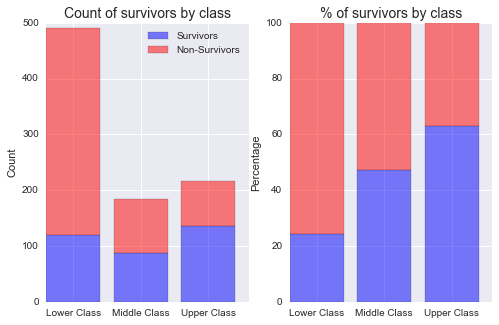

In [19]:
# calculate values for each survival status
survivors_class = survivors_data.groupby(['Pclass']).size().values
non_survivors_class = non_survivors_data.groupby(['Pclass']).size().values

# calculate totals for percentates
totals = survivors_class + non_survivors_class

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_class, totals)*100 
data2_percentages = calculate_percentage(non_survivors_class, totals)*100 

class_categories = ['Lower Class', 'Middle Class', 'Upper Class']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_class)), survivors_class, label='Survivors', alpha=0.5, color='b')
ax1.bar(range(len(non_survivors_class)), non_survivors_class, bottom=survivors_class, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4, 2.4], class_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by class",fontsize=14)
plt.legend(loc='upper right')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='b')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks([0.4, 1.4, 2.4],  class_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by class",fontsize=14)

The graphs above shows that whilst the lower class had more passengers, than all classes, and more survivors than the middle class, the lower class had the lowest survival rate. The Upper Class passengers had the highest survival rate.

# Hypotesting
 
H0 = Pclass has no relationship with survival.
H1 = Pclass has relationship with survival.

Conclusion: 
Chi-Square-Test shows p value less than 0.05. So at alpha=0.05 level we reject H0 and consider that Pclass has relationship with survival.

In [20]:
table = pd.crosstab([titanic_df['Survived']], titanic_df['Pclass'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
print table
print results

Pclass    Lower Class  Middle Class  Upper Class
Survived                                        
False             372            97           80
True              119            87          136
[['Chi-Square Test', 102.88898875696057], ['P-Value', 4.5492517112987287e-23]]


# 5.3 Survival analysis by the number of parents and children/brother and sister

In [21]:
# Survival rate of Parch variable
print  titanic_df.groupby('Parch').Survived.mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


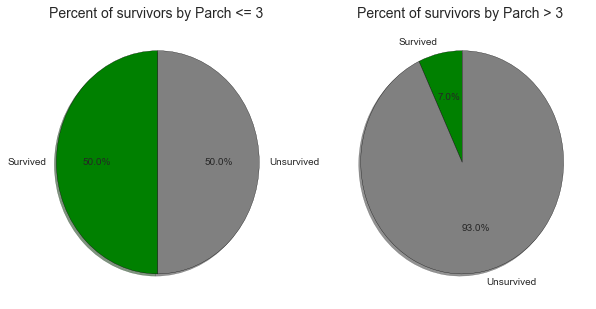

In [22]:
labels = 'Survived', 'Unsurvived'
colors = ['green', 'gray']

data1 = np.array([0.5,0.5])
data2 = np.array([0.07,0.93])

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.pie(data1,labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title("Percent of survivors by Parch <= 3 ",fontsize=14)

ax2.pie(data2,labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title("Percent of survivors by Parch > 3 ",fontsize=14)

plt.show()

This figue shows Parch group which is less or equal than 3 has higher survival percentage.

In [23]:
# Survival rate of SibSp variable
print  titanic_df.groupby('SibSp').Survived.mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


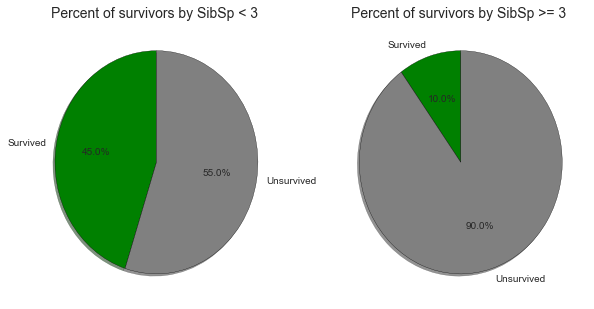

In [24]:
labels = 'Survived', 'Unsurvived'
colors = ['green', 'gray']

data1 = np.array([0.45,0.55])
data2 = np.array([0.10,0.90])

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.pie(data1,labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title("Percent of survivors by SibSp < 3 ",fontsize=14)

ax2.pie(data2,labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title("Percent of survivors by SibSp >= 3 ",fontsize=14)

plt.show()

This figure shows SibSp group which is less than 3 has higher survival rate.

# 5.4 Age and Survival(using dataset removed missing age values)

In [25]:
# age group distribution
print titanic_dropna.groupby(['age_group']).Survived.mean()

age_group
0-9      0.612903
10-19    0.401961
20-29    0.350000
30-39    0.437126
40-49    0.382022
50-59    0.416667
60-69    0.315789
70-79    0.000000
Name: Survived, dtype: float64


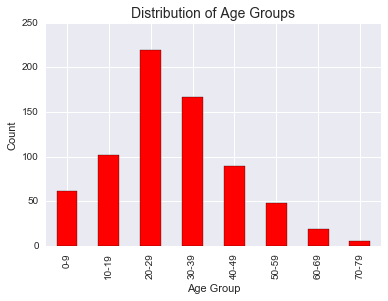

In [26]:
titanic_dropna.groupby(['age_group']).size().plot(kind='bar',stacked=True,color='r')
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');
# From the plot above we can see that the majority of passengers were aged between 20-29

In [27]:
survivors_data2 = titanic_dropna[titanic_dropna.Survived==True]
non_survivors_data2 = titanic_dropna[titanic_dropna.Survived==False]

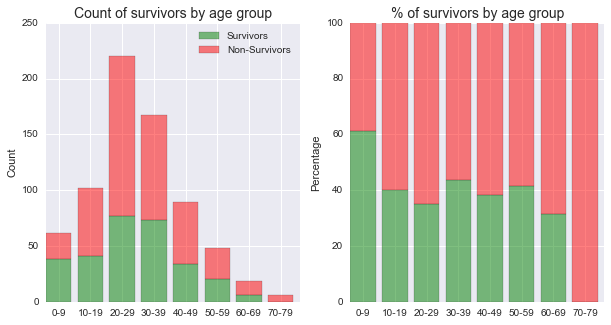

In [28]:
# calculate values for each survival status
survivors_age_group = survivors_data2.groupby(['age_group']).size().values
non_survivors_age_group = non_survivors_data2.groupby(['age_group']).size().values

# calculate totals for percentates
totals = survivors_age_group + non_survivors_age_group

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_age_group, totals)*100 
data2_percentages = calculate_percentage(non_survivors_age_group, totals)*100 


tick_spacing = np.array(range(len(age_labels)))+0.4


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_age_group)), survivors_age_group, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_age_group)), non_survivors_age_group, bottom=survivors_age_group, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks(tick_spacing, age_labels )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by age group",fontsize=14)
plt.legend(loc='upper right')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks(tick_spacing,  age_labels)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by age group",fontsize=14)

This plot shows old people have lowest survial rate.It is some confusing and we shoud take into consideration the gender / sex of the passengers as well.

# Hypotesting
 
H0 = Age has no relationship with survival.
H1 = Age has relationship with survival.

Conclusion: 
Chi-Square-Test shows p value less than 0.05. So at alpha=0.05 level we reject H0 and consider that age has relationship with survival.

In [29]:
table = pd.crosstab([titanic_dropna['Survived']], titanic_dropna['age_group'])
chi2, p, dof, expected = stats.chi2_contingency(table.values)
results = [
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
print table
print results

age_group  0-9  10-19  20-29  30-39  40-49  50-59  60-69  70-79
Survived                                                       
False       24     61    143     94     55     28     13      6
True        38     41     77     73     34     20      6      0
[['Chi-Square Test', 19.530055983108639], ['P-Value', 0.0066794173710035933]]


# 5.5 Survival analysis by gender and age group

In [30]:
print titanic_dropna.groupby(['Sex','age_group']).Survived.mean()

Sex     age_group
female  0-9          0.633333
        10-19        0.755556
        20-29        0.722222
        30-39        0.833333
        40-49        0.687500
        50-59        0.888889
        60-69        1.000000
male    0-9          0.593750
        10-19        0.122807
        20-29        0.168919
        30-39        0.214953
        40-49        0.210526
        50-59        0.133333
        60-69        0.133333
        70-79        0.000000
Name: Survived, dtype: float64


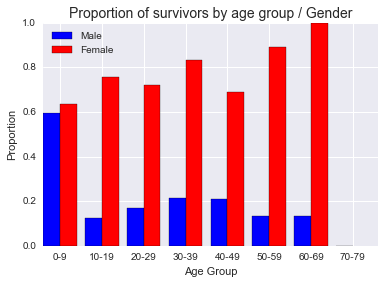

In [31]:
male_data = titanic_dropna[titanic_dropna.Sex == "male"].groupby('age_group').Survived.mean().values
female_data = titanic_dropna[titanic_dropna.Sex == "female"].groupby('age_group').Survived.mean().values
ax = plt.subplot()
male_plt_position = np.array(range(len(age_labels)))
female_plt_position = np.array(range(len(age_labels)))+0.4
ax.bar(male_plt_position, male_data,width=0.4,label='Male',color='b')
ax.bar(female_plt_position, female_data,width=0.4,label='Female',color='r')
plt.xticks(tick_spacing,  age_labels)
ax.set_ylabel("Proportion")
ax.set_xlabel("Age Group")
ax.set_title("Proportion of survivors by age group / Gender",fontsize=14)
plt.legend(loc='best')
plt.show()

The plot "Proportion of survivors by age group / gender" shows that children (0-9 years old, male and female) and women (all ages) had a much higher proportion of survivors. This supports the notion of the seats in the lifeboats been given to Women and Children first.

# 6. Conclusion 

6.1 Summary of data analysis
(a) Gender,age,social class, number of parents/children and number of sisters/brothers are all the factor which have effect on survival rate.
(b) Social class analysis shows that whilst the lower class had more passengers, than all classes, and more survivors than the middle class, the lower class had the lowest survival rate. The Upper Class passengers had the highest survival rate.
(c) Age/gender analysis shows children (0-9 years old, male and female) and women (all ages) had a much higher proportion of survivors. 
(d) Passengers with the number of parent/childer (<=3) or number of sisters/brothers(< 3) have higher survival rate. 
The weight of each risk factors in the survival rate can be studied by setting up predictive models.

6.2 Limitations
The are a number of limitations with the Titanic Dataset, which are caused by:
1.missing data
2.only been a sample of the data
The missing data and size of the sample could skew the results for example the missing ages.


In [32]:
print missing_ages.groupby('Sex').size()

Sex
female     53
male      124
dtype: int64


The above table shows that there were 53 ages missing for females and 124 ages missing for males. Different ways to deal with missing values have different prons and cons.

1.Delete the rows with the missing ages - this would limit the accuracy of the analysis of the gender and class, however the accuracy of the analysis of the Age factor would be more accurate.
2.Generate ages based on the mean of ages - this could skew the results of the age analysis. In section 4.1, figure shows filling in missing values with the Age column artificially affects the distribution. We can observe this by plotting the line before and after.
So removing passengers missing with age variable while we need to analyzing aging variable would be a simple way which has less effect on other variables.

The size of the sample data could also impact the results as we don't know if this is a random sample or if the selection of the data is biased or unbiased.


6.3 Other variables 

As with most datasets the more information we have the better it can be analysed. I believe that we could add the following variables:
•passenger or crew - the current dataset doesn't distingush between passenger or crew, however from history we know that a mixture of both survived.
•life boat number - the reason why there were so many fatalities on board the Titanic was due to there not been enough lifeboats. I believe that if we knew the lifeboat number and the capacity of a lifeboat we could determine if it was possible for more people to survive.